<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساعت یابی
</font>
</h1>

---

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش کتابخانه‌های مورد نیاز برای انجام پروژه را وارد می‌کنیم.
</font>
</p>

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بارگذاری تصاویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصاویری که در به عنوان نمونه در اختیار شما قرار گرفته است را در سلول زیر بارگذاری کنید. و سپس به کمک <code>matplotlib</code> نمایش دهید.
</font>
</p>

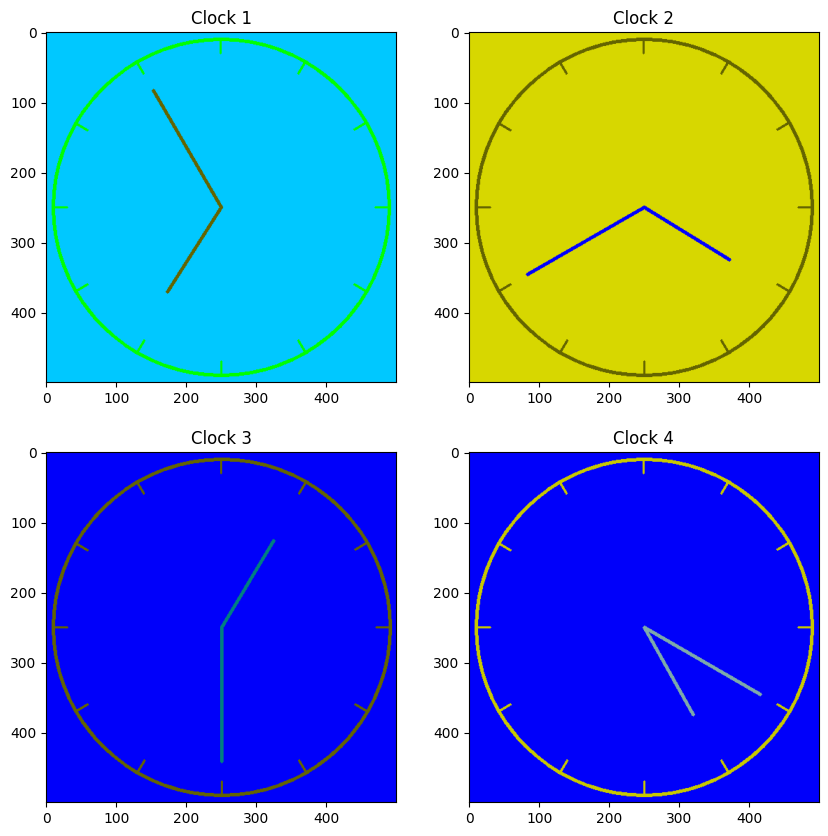

In [66]:
clk1 = cv2.imread('../Data/clock1.png')
clk2 = cv2.imread('../Data/clock2.png')
clk3 = cv2.imread('../Data/clock3.png')
clk4 = cv2.imread('../Data/clock4.png')

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(clk1)
plt.title('Clock 1')
plt.subplot(2,2,2)
plt.imshow(clk2)
plt.title('Clock 2')
plt.subplot(2,2,3)
plt.imshow(clk3)
plt.title('Clock 3')
plt.subplot(2,2,4)
plt.imshow(clk4)
plt.title('Clock 4')
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سیاه و سفید سازی تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابعی که در تمرین پیش نوشتید،  در مرحله تصاویر را به شکل ساعت های نرمال درآورید.
</font>
</p>

In [67]:
def black_white_convertor(image):
    x = image[0, 0]
    mask = np.all(image == x, axis=-1)

    final_image = np.zeros_like(image)
    final_image[mask] = [255, 255, 255]

    final_image_gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)
    final_image = final_image_gray
    return final_image


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیدا کردن ساعت
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
به کمک تبدیل هاف سعی کنید پارامتر های متد را طوری تنظیم کنید تا در نهایت یک دایره که دایره اصلی است پیدا شود. در نهایت دایره را با رنگ سبز روی تصویر سیاه و سفید شده رسم کنید.
</font>
</p>

250 250 242


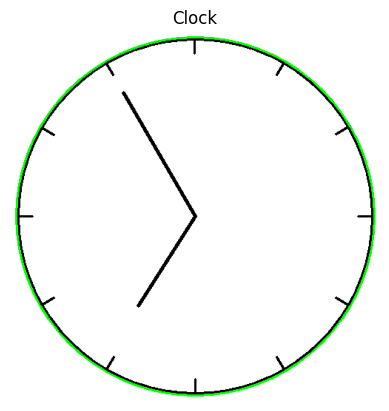

In [82]:
gray = black_white_convertor(clk1)
gray_blur = cv2.GaussianBlur(gray, (9,9), 2)

edges = cv2.Canny(gray_blur, threshold1=50, threshold2=150)

h, w = gray.shape
minR = int(min(h,w)*0.4)
maxR = int(min(h,w)*0.5)

circles = cv2.HoughCircles(
    image=gray_blur,
    method=cv2.HOUGH_GRADIENT,
    dp=1.0,
    minDist=100,
    param1=200,
    param2=60,
    minRadius=minR,
    maxRadius=maxR
)

if circles is not None:
    circles = np.uint16(np.around(circles[0]))
    cx, cy, r = max(circles, key=lambda x: x[2])
    print(cx, cy, r)
    img3channel = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    cv2.circle(img3channel, (cx, cy), r, (0,255,0), 2)

    plt.imshow(cv2.cvtColor(img3channel, cv2.COLOR_BGR2RGB))
    plt.title("Clock")
    plt.axis('off')
    plt.show()

}<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیدا کردن عقربه ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دوباره با تبدیل هاف در سلول زیر سعی کنید خطوط (عقربه ها) را پیدا کنید. احتمالا پس از تنظیم پارامترها، چندین خط پیدا شود اما باید پس از پیدا شدن خطوط، عملیات پس پردازش را طوری تنظیم کنید که دو خط بزرگتر و کوچکتر پیدا شود که همان عقربه ساعت شمار و دقیقه شمار است. برای مثال از خطوطی که زاویه صفر دارند باید صرف نظر شود و...
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">

بعد از اجرای متد پیدا کردن خطوط به کمک تبدیل هاف، ما یه لیست از خطوط داریم (`lines`)
می‌خوایم خطوطی رو پیدا کنیم که:  
- به مرکز ساعت نزدیک باشن (احتمالاً عقربه‌ها هستن).  
- طول مناسبی داشته باشن (خیلی کوتاه نباشن).  
- موازی هم نباشن (چون ساعت و دقیقه زاویه متفاوتی دارن).  
در نهایت، از بین خطوط معتبر، دو خط رو انتخاب کنیم: یکی بلندتر (دقیقه) و یکی کوتاه‌تر (ساعت).  


پیدا کردن پارامتر های مناسب برای متد و عملیات پس پردازش خوب برای پیدا کردن عقربه ها، چالش سلول پایین است.

منطق کلی valid_lines
-  فیلتر اولیه: خطوطی که نزدیک مرکز نیستن یا خیلی کوتاهن حذف می‌شن. 
-  حذف موازی‌ها: خطوطی که زاویه‌شون شبیه هم باشه، فقط بلندترینشون نگه داشته می‌شه.
-  انتخاب نهایی: از خطوط باقی‌مونده، دو خط با طول‌های متفاوت انتخاب می‌شن (بلندتر برای دقیقه، کوتاه‌تر برای ساعت).
</div>

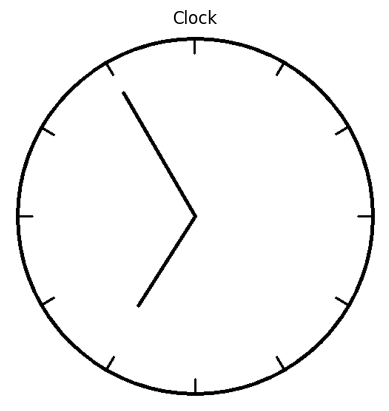

In [69]:
# پیدا کردن خطوط




line_hour, line_minute = None, None







# رسم خطوط پیدا شده روی تصویر. عقربه دقیقه شمار سبز و عقربه ساعت شمار قرمز



# نمایش نتیجه
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Clock")
plt.axis('off')
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نوشتن تابع نهایی
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در نهایت تابعی بنویسید که تصویر سیاه و سفید شده را دریافت کند و پس از پیدا کردن خطوط و دایره، خطوط و دایره را روی تصویر دریافتی رسم کند و تصویر نهایی را return کند.
<br>
در واقع در سلول های قبل کد ها نوشته شده و در این سلول باید کدهای اضافه حذف شوند و و بخش های اصلی الگوریتم نگهداری شوند.
</font>
</p>

In [70]:
def detect_clock(binary_image):
    
    
    return new_image

<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد. توجه کنید برای کسب نمره کامل از این تمرین باید هر دو تابع خواسته شده را به درستی بنویسید.
</font>
</p>

In [71]:
import zipfile
from inspect import getsource


def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

imp = """
import cv2
import numpy as np
"""

%save black_white_convertor imp + getsource(black_white_convertor)
%save detect_clock imp + getsource(detect_clock)

file_names = ["black_white_convertor.py","detect_clock.py", "notebook.ipynb"]
compress(file_names)

The following commands were written to file `black_white_convertor.py`:

import cv2
import numpy as np
def black_white_convertor(image):
    x = image[0, 0]
    mask = np.all(image == x, axis=-1)

    final_image = np.zeros_like(image)
    final_image[mask] = [255, 255, 255]

    final_image_gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)
    final_image = final_image_gray
    return final_image

The following commands were written to file `detect_clock.py`:

import cv2
import numpy as np
def detect_clock(binary_image):


    return new_image

File Paths:
['black_white_convertor.py', 'detect_clock.py', 'notebook.ipynb']
